# Libraries

In [ ]:
import pandas as pd                  #-- Work with DataFrames
import numpy as np                   #-- Work with DataFrames
import string                        #-- Work with String
import re                            #-- Regular Expression
import pickle                        #-- Save Objects
from matplotlib import pyplot as plt #-- Matplotlib
import seaborn as sns                #-- Plots
from pprint import pprint            #-- Multiple Prints
from collections import Counter      #-- Count Words
from wordcloud import WordCloud      #-- WordCloud

#-- Nltk Package
import nltk
from nltk.corpus import stopwords            #-- Stopwords  
from nltk.stem import PorterStemmer          #-- Stemmization
from nltk.tokenize import WordPunctTokenizer #-- Tokenization
from nltk.stem import WordNetLemmatizer      #-- Lemmatization

#-- Sklearn Package
from sklearn.feature_extraction.text import CountVectorizer      #-- Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer      #-- Tf-Idf
from sklearn.decomposition import TruncatedSVD                   #-- SVD
from sklearn.svm import SVC                                      #-- SVM
from sklearn.model_selection import train_test_split             #-- Split Dataset
from sklearn.metrics import classification_report                #-- Model Summary 
from sklearn.ensemble import RandomForestClassifier              #-- Random Forest
from sklearn.cluster import KMeans                               #-- K-means Algorithm
from sklearn.metrics import confusion_matrix                     #-- Confusion Matrix
from sklearn.metrics.cluster import normalized_mutual_info_score #-- Mutual Information Score
from sklearn.cluster import DBSCAN                               #-- DBSCAN
from sklearn.cluster import AgglomerativeClustering              #-- Hierarchical
from sklearn.neighbors import KNeighborsClassifier               #-- knn

#-- Scipy Package
from scipy.sparse import random as sparse_random

#-- Gensim Package
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

import warnings
warnings.filterwarnings("ignore", category = FutureWarning) 

In [ ]:
#-- Mount Files in Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
nltk.download('stopwords') #-- Download English Stopwords
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Reading File

In [ ]:
reviews = pd.read_csv('/content/gdrive/MyDrive/progetto text mining/Reviews.csv',
                      sep = ",") 
reviews.head()

In [ ]:
reviews = pd.read_csv('/content/gdrive/MyDrive/Università/Data Science/2° Anno/Text Mining and Search/Dataset/Reviews.csv',
                      sep = ",")

In [ ]:
print(reviews.shape)

(568454, 10)


In [ ]:
#-- Remove Duplicates
final_reviews = reviews.drop_duplicates(subset = {"UserId",
                                                  "ProfileName",
                                                  "Time",
                                                  "Text"})

In [ ]:
#-- Differences 
print(reviews.shape)
print(final_reviews.shape)

(1000, 10)
(998, 10)


Text(0, 0.5, 'Frequenza')

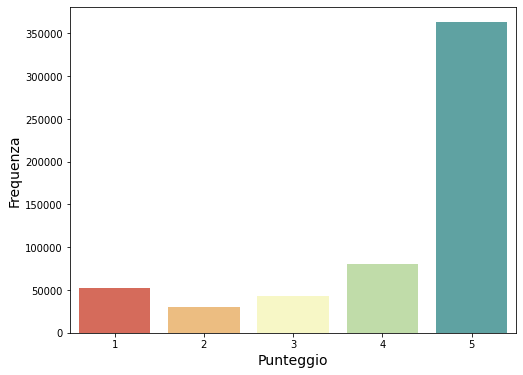

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(reviews["Score"],
              palette = "Spectral")
plt.xlabel("Punteggio", size = 14)
plt.ylabel("Frequenza", size = 14)

## Balancing 'Score' Variable

In [ ]:
final_reviews_balanced = (final_reviews.groupby('Score', as_index = False) #-- Group By Score
                            .apply(lambda x: x.sample(n = 10000))          #-- Sample Rows
                            .reset_index(drop = True))                     #-- Reset Index

Text(0, 0.5, 'Frequenza')

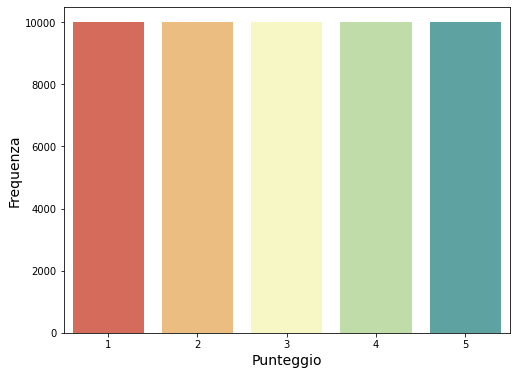

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(final_reviews_balanced["Score"], #-- Data
              palette = "Spectral")            #-- Colors
plt.xlabel("Punteggio", size = 14)
plt.ylabel("Frequenza", size = 14)

In [ ]:
np.percentile(final_reviews_balanced["Text"].str.len(), q = 90)

951.0

(0.0, 5000.0)

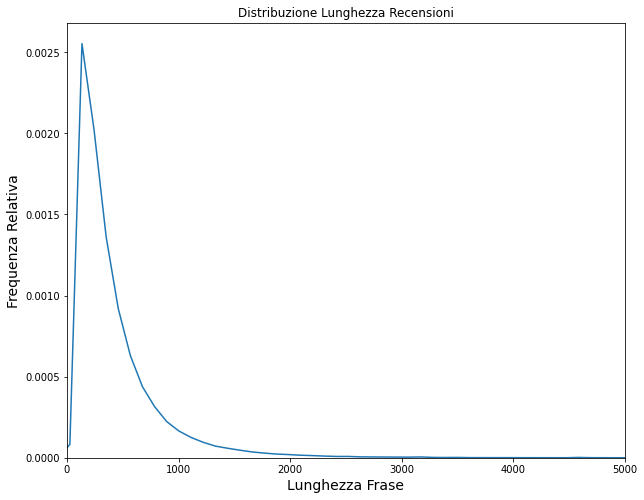

In [ ]:
plt.figure(figsize = (10, 8))
sns.distplot(reviews["Text"].str.len(), hist = False).set_title('Distribuzione Lunghezza Recensioni')
plt.ylabel("Frequenza Relativa", size = 14)
plt.xlabel("Lunghezza Frase", size = 14)
plt.xlim(0, 5000)

In [ ]:
score   = final_reviews_balanced['Score']
summary = final_reviews_balanced['Summary']
text    = final_reviews_balanced['Text']

## Pre-Processing

* Lower Case
* Remove Blankspace
* Remove Numbers
* Tokenization
* Remove Stopwords
* Lemmatization
* Stemmization

In [ ]:
def preprocessing(doc_text):
    tokenized = []              #-- List for Tokenization
    tokenized_no_stopwords = [] #-- List for Tokenization not a Stopword
    lemmed = []                 #-- List of Lemmatized Words
    stemmed = []                #-- List of Stemmed Words
    
    doc_text = doc_text.str.lower() #-- Lower Case
    
    for phrase in doc_text:
        phrase = re.sub(r'\d+', '', phrase)                          #-- Remove Blankspace
        phrase = phrase.translate(str.maketrans('', '',
                                                string.punctuation)) #-- Remove Punctuation
        phrase = WordPunctTokenizer().tokenize(phrase)               #-- Tokenization
        tokenized.append(phrase)                                     #-- Add to Tokenization List
    
    #-- Remove Stopwords
    stop = nltk.corpus.stopwords.words('english') #-- English Stopwords
    
    for phrase in tokenized:
        temp = []                           #-- Temporary File for a Single Sentence
        for token in phrase:
            if token not in stop:           #-- If the Token is a Stopword
                temp.append(token)          #-- Add to Temp List
        tokenized_no_stopwords.append(temp) #-- Otherwise is not a Stopword
            
    #-- Stemmatization and Lemmization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    for phrase in tokenized_no_stopwords:
        temp_stem = [] #-- Temp List for Stemmatization
        temp_lem = []  #-- Temp List for Lemmatizaion

        for word in phrase:
            temp_stem.append(stemmer.stem(word))
            temp_lem.append(lemmatizer.lemmatize(word))
        stemmed.append(temp_stem)
        lemmed.append(temp_lem)
    
    return (stemmed, #-- Stemmed List
            lemmed)  #-- Lemmed List

In [ ]:
text = preprocessing(doc_text = text)

In [ ]:
stemmed = text[0] #-- List of Stemmed Sentences
lemmed = text[1]  #-- List of Lemmed Sentences

In [ ]:
print(stemmed[1])
print(lemmed[1])

['tea', 'carri', 'flavor', 'one', 'would', 'expect', 'smell', 'terribl', 'invigor', 'like', 'punctur', 'wound', 'reviv', 'drink', 'discov', 'still', 'alivebr', 'br', 'well', 'one', 'tea', 'bag', 'enough', 'motherinlaw', 'said', 'oh', 'smell', 'kind', 'like', 'wine', 'okay', 'kind', 'like', 'wine', 'hint', 'rot', 'moldi', 'aftertast', 'like', 'whole', 'box']
['tea', 'carry', 'flavor', 'one', 'would', 'expect', 'smell', 'terrible', 'invigorates', 'like', 'puncture', 'wound', 'revival', 'drinking', 'discover', 'still', 'alivebr', 'br', 'well', 'one', 'tea', 'bag', 'enough', 'motherinlaw', 'said', 'oh', 'smell', 'kind', 'like', 'wine', 'okay', 'kind', 'like', 'wine', 'hint', 'rot', 'moldy', 'aftertaste', 'like', 'whole', 'box']


In [ ]:
#@title Saving Files {display-mode: "form"}

with open('stemma.pkl', 'wb') as f:
  pickle.dump(stemmed, f)

with open('lemma.pkl', 'wb') as f:
  pickle.dump(lemmed, f)


# Text Representation

* Bag of Words
* Binary
* Tf-Idf

It is necessary to trasform the list of tokens of a sentence in a single list.

In [ ]:
def token_to_phrase(token_list):
    phrase_list = []
    
    for phrase in token_list:
        seq = ""
        for word in phrase:
            seq = seq + " " + word #-- Add a Blankspace
        phrase_list.append(seq)    #-- Attach each Token in a Phrase
    return phrase_list

In [ ]:
stemmed_preprocessed = token_to_phrase(token_list = stemmed)
lemmed_preprocessed  = token_to_phrase(token_list = lemmed)

In [ ]:
print(stemmed_preprocessed[1])
print(lemmed_preprocessed[1])

## Bag of Words

In [ ]:
vectorizer = CountVectorizer(max_features = 10000)

X_stemmed_bow =  vectorizer.fit_transform(stemmed_preprocessed)
X_lemmed_bow = vectorizer.fit_transform(lemmed_preprocessed)

print(X_lemmed_bow.shape)
print(X_stemmed_bow.shape)

## Binary

In [ ]:
vectorizer = CountVectorizer(binary = True,
                             max_features = 10000)

X_stemmed_binary =  vectorizer.fit_transform(stemmed_preprocessed)
X_lemmed_binary = vectorizer.fit_transform(lemmed_preprocessed)

print(X_lemmed_binary.shape)
print(X_stemmed_binary.shape)

## Tf-Idf

In [ ]:
vectorizer = TfidfVectorizer(max_features = 10000)

X_stemmed_tfidf = vectorizer.fit_transform(stemmed_preprocessed)
X_lemmed_tfidf = vectorizer.fit_transform(lemmed_preprocessed)

In [ ]:
#@title Saving Files {display-mode: "form"}

dataset_list = [X_stemmed_binary, X_stemmed_bow,
                X_stemmed_tfidf, X_lemmed_tfidf,
                X_lemmed_binary, X_lemmed_bow,
                score]

with open('lista_dataset.pkl', 'wb') as f:
  pickle.dump(dataset_list, f)

!cp lista_dataset.pkl '/content/gdrive/MyDrive/progetto text mining/lista_dataset.pkl'

In [ ]:
dataset_list = [X_stemmed_binary, X_stemmed_bow,
                X_stemmed_tfidf, X_lemmed_tfidf,
                X_lemmed_binary, X_lemmed_bow]

dataset_names = ['X_stemmed_binary', 'X_stemmed_bow',
                 'X_stemmed_tfidf', 'X_lemmed_tfidf',
                 'X_lemmed_binary', 'X_lemmed_bow']

# Dimensionality Reduction


## SVD

In [ ]:
X = []
i = 0

#-- Not Considered Score
for dataset in dataset_list:
  print(dataset.shape)
  svd = TruncatedSVD(n_components = 300,    #-- Number of Components
                     n_iter = 100)          #-- Number of Iterations
  temp = svd.fit_transform(dataset)         #-- Apply SVD to Dataset
  
  print(dataset_names[i])                   #-- Print Single Dataset
  print(sum(svd.explained_variance_ratio_)) #-- Print Explained Variance
  X.append(temp)
  i += 1

In [ ]:
#@title Saving Files {display-mode: "form"}

with open('X_svd_list.pkl', 'wb') as f:
  pickle.dump(X, f)

!cp X_svd_list.pkl '/content/gdrive/MyDrive/progetto text mining/X_svd_list.pkl'

# This code will be hidden when the notebook is loaded.


#Classification

## SVM

In [ ]:
classifier_list_svm = []

for i in range(0, 6):
  X_train, X_test, y_train, y_test = train_test_split(X[i],              #-- Single Text
                                                      score,             #-- Score Dataset
                                                      test_size = 0.33,  #-- Train Test Split
                                                      random_state = 42) #-- Set Seed
  clf = SVC().fit(X_train, y_train) #-- SVM
  y_pred = clf.predict(X_test)      #-- Prediction

  print(dataset_names[i])                      #-- Print Single Dataset
  print(classification_report(y_test, y_pred)) #-- Model Summary
  classifier_list_svm.append(clf)

## kNN

In [ ]:
classifier_list_knn = []

for i in range(0,6):

  X_train, X_test, y_train, y_test = train_test_split(X[i],              #-- Dataset
                                                      score,             #-- Score
                                                      test_size = 0.33,  #-- Train Test Split
                                                      random_state = 42) #-- Set Seed

  knn = KNeighborsClassifier(n_neighbors = 5,
                             n_jobs = -1).fit(X_train, y_train) #-- kNN
  y_pred = knn.predict(X_test)                                  #-- Prediction

  print(dataset_names[i])                      #-- Print Single Dataset
  print(classification_report(y_test, y_pred)) #-- Model Summary
  classifier_list_knn.append(knn)

## Random Forest

In [ ]:
classifier_list_rf = []

for i in range(0, 6):

  X_train, X_test, y_train, y_test = train_test_split(X[i],              #-- Dataset
                                                      score,             #-- Score
                                                      test_size = 0.33,  #-- Train Test Split
                                                      random_state = 42) #-- Set Seed

  rf = RandomForestClassifier(n_jobs = -1).fit(X_train, y_train) #-- Random Forest
  y_pred = rf.predict(X_test)                                    #-- Prediction

  print(dataset_names[i])                      #-- Print Single Dataset
  print(classification_report(y_test, y_pred)) #-- Model Summary
  classifier_list_rf.append(rf)

In [ ]:
#@title Saving Files {display-mode: "form"}

with open('classifier_list_svm.pkl', 'wb') as f:
  pickle.dump(classifier_list_svm, f)

!cp classifier_list_svm.pkl '/content/gdrive/MyDrive/progetto text mining'

with open('classifier_list_knn.pkl', 'wb') as f:
  pickle.dump(classifier_list_knn, f)

!cp classifier_list_knn.pkl '/content/gdrive/MyDrive/progetto text mining'

with open('classifier_list_rf.pkl', 'wb') as f:
  pickle.dump(classifier_list_rf, f)

!cp classifier_list_rf.pkl '/content/gdrive/MyDrive/progetto text mining'

# This code will be hidden when the notebook is loaded.


# Clustering

## k-Means

In [ ]:
cluster_kmeans_list = []

for i in range(0, 6):
    
  kmeans = KMeans(n_clusters = 5).fit(X[i])
  cluster_kmeans = kmeans.labels_ + 1

  print(dataset_names[i])                             #-- Print Single Dataset
  print(confusion_matrix(score, cluster_kmeans))      #-- Confusion Matrix
  print(normalized_mutual_info_score(score,
                                     cluster_kmeans)) #-- Mutual Information Score
  cluster_kmeans_list.append(kmeans)

### Word Cloud

In [ ]:
def plot_wordcloud(cnt):
  wordcloud = WordCloud(max_font_size = 50,         #-- Font Size
                        max_words = 100,            #-- Mamimum Words
                        background_color = "white") #-- Color Space
  wordcloud.generate_from_frequencies(dict(cnt))
  plt.figure()
  plt.imshow(wordcloud, interpolation = "bilinear")
  plt.axis("off")
  plt.show()

def count_words(text):
  cnt = Counter()
  for sent in text:
    for token in sent:
      if token not in ['br']:
        cnt[token] += 1
  return cnt.most_common()[20:70]

In [ ]:
dataset_lemma = pd.DataFrame()
dataset_lemma['X_lemmed_tfidf_kmeans'] = cluster_kmeans_list[3].labels_ + 1
dataset_lemma ['lemma'] = lemmed

In [ ]:
for i in range(1, 6):
  temp = dataset_lemma[dataset_lemma['X_lemmed_tfidf_kmeans'] == i]['lemma']
  cnt = count_words(temp)
  plot_wordcloud(cnt)

## Hierarchical

In [ ]:
cluster_agglomerative = []

for i in range(0, 6):
  agglomerative = AgglomerativeClustering(distance_threshold = None,    #-- Number Cluster to Find
                                          n_clusters = 5,               #-- Number of Cluster
                                          affinity = 'cosine',          #-- Metric
                                          linkage = 'single').fit(X[i]) #-- Linkage
  labels_agglomerative = agglomerative.labels_ + 1                      #-- Cluster Label
    
  print(dataset_names[i])                                   #-- Print Single Dataset
  print(confusion_matrix(score, labels_agglomerative))      #-- Confusion Matrix
  print(normalized_mutual_info_score(score,
                                     labels_agglomerative)) #-- Mutual Information Score
  cluster_agglomerative.append(agglomerative)


In [ ]:
#@title Saving Files {display-mode: "form"}

with open('kmeans.pkl', 'wb') as f:
  pickle.dump(cluster_kmeans_list, f)

!cp kmeans.pkl '/content/gdrive/MyDrive/progetto text mining'

with open('agglomerative.pkl', 'wb') as f:
  pickle.dump(cluster_agglomerative, f)

!cp agglomerative.pkl '/content/gdrive/MyDrive/progetto text mining'

# This code will be hidden when the notebook is loaded.


# Topic Modeling with LSA

In [ ]:
lemmed_preprocessed = []

for row in lemmed:
    sequ = ''
    for word in row:
        sequ = sequ + ' ' + word
    lemmed_preprocessed.append(sequ)

In [ ]:
vectorizer = TfidfVectorizer(max_features = 1000, #-- Top Mamimum Feature
                             max_df = 0.5,        #-- Ignore Words with Frequency > 0.5
                             smooth_idf = True)   #-- Smooth Idf Weights
X_lemmed_tfidf = vectorizer.fit_transform(lemmed_preprocessed)

svd_model = TruncatedSVD(n_components = 10,        #-- Number of Components
                         algorithm = 'randomized', #-- SVD Solver to Use
                         n_iter = 100,             #-- Number of Iterations
                         random_state = 122)       #-- Set Seed

svd_model.fit(X_lemmed_tfidf)
print(len(svd_model.components_))

## Print Topics

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp,
                          key = lambda x:x[1],
                          reverse = True)[:5]
    
    print("Topic " + str(i) + ": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

# Topic Modeling with LDA

In [ ]:
dictionary = gensim.corpora.Dictionary(lemmed)
dictionary.filter_extremes(no_below = 5,
                           no_above = 0.5,
                           keep_n = 100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in lemmed]
coherence_list = []

for i in [3,5,7,9]:
  lda_model = gensim.models.LdaModel(bow_corpus, 
                                     id2word = dictionary,
                                     num_topics = i,
                                     offset = 2,
                                     random_state = 100,
                                     update_every = 1,
                                     passes = 10,
                                     alpha = 'auto',
                                     eta = "auto",
                                     per_word_topics = True)
  
  coherence_model_lda = gensim.models.CoherenceModel(model = lda_model, 
                                                     texts = lemmed,
                                                     dictionary = dictionary,
                                                     coherence = 'c_v')
  
  print('Coherence Score: ', coherence_model_lda)
  coherence_list.append(coherence_model_lda.get_coherence())

In [ ]:
#-- DataFrame LDA for Plotting Coherence
lda_grap = pd.DataFrame()
lda_grap['Num_topics'] = [3, 5, 7, 9]
lda_grap['Coherence'] = coherence_list

#-- Plot Coherence
fig = plt.figure()
ax = plt.axes()

ax.plot([3,5,7,9], coherence_list)
ax.scatter([3,5,7,9], coherence_list,
           s = 75, zorder = 2)

## Print Topics

In [ ]:
pprint(lda_model.print_topics())